In [1]:
#Import all the required libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import scikitplot as skplt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score,make_scorer,roc_curve
import re

import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

np.random.seed(2020) #setting random seed 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df_twitter=pd.read_csv('train_data.csv')

## Exploratory Data Analysis (EDA)

In [3]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2797 entries, 0 to 2796
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2797 non-null   float64
 1   id_str                 2797 non-null   object 
 2   screen_name            2797 non-null   object 
 3   location               1777 non-null   object 
 4   description            2394 non-null   object 
 5   url                    1455 non-null   object 
 6   followers_count        2797 non-null   int64  
 7   friends_count          2797 non-null   int64  
 8   listed_count           2797 non-null   int64  
 9   created_at             2797 non-null   object 
 10  favourites_count       2797 non-null   int64  
 11  verified               2797 non-null   bool   
 12  statuses_count         2797 non-null   int64  
 13  lang                   2797 non-null   object 
 14  status                 2508 non-null   object 
 15  defa

In [4]:
df_twitter.head()

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,8.160000e+17,"""815745789754417152""","""HoustonPokeMap""","""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...","""https://t.co/dnWuDbFRkt""",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\r ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,False,"""Houston PokŽ Alert""",1
1,4.843621e+09,4843621225,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,NaN,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,False,Keri Nelson,1
2,4.303727e+09,4303727112,mattlieberisbot,NaN,"Inspired by the smart, funny folks at @replyal...",https://t.co/P1e1o0m4KC,1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,False,Matt Lieber Is Bot,1
3,3.063139e+09,3063139353,sc_papers,NaN,NaN,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,False,single cell papers,1
4,2.955142e+09,2955142070,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,NaN,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,False,lucarivera16,1


In [5]:
df_twitter.bot.value_counts()

0    1476
1    1321
Name: bot, dtype: int64

In [6]:
df_twitter.describe()

,id,followers_count,friends_count,listed_count,favourites_count,statuses_count,bot
count,2.797000e+03,2.797000e+03,2.797000e+03,2797.000000,2797.000000,2.797000e+03,2797.000000
mean,1.482460e+17,9.964245e+05,4.796493e+03,3192.299964,2035.577047,1.945170e+04,0.472292
std,3.100578e+17,5.593714e+06,5.619217e+04,17283.423291,16073.463967,1.543729e+05,0.499321
min,3.526000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,6.895649e+07,4.400000e+01,1.100000e+01,1.000000,0.000000,1.660000e+02,0.000000
50%,1.917035e+09,3.430000e+02,1.840000e+02,17.000000,25.000000,2.240000e+03,0.000000
75%,3.326332e+09,1.372500e+04,6.690000e+02,332.000000,491.000000,1.004200e+04,1.000000
max,8.410000e+17,9.632156e+07,2.056668e+06,620331.000000,714021.000000,6.863363e+06,1.000000


#### Continuous Features (Data Quality Report)

In [7]:
#Code of adding cardinality, Median and missing percentage to data quality report of Continuous features. 

def cont_data_quality_report(df,viz=True):
    df_desc=df.describe()
    cols=df_desc.columns
    med_ls=[]
    miss_ls=[]
    card_ls=[]
    bar_ls=[]
    for c in cols:
        median=np.median(df[c])
        miss_perc=((df[c].isnull().sum())*100)/len(df)
        card=df[c].nunique()
        med_ls.append(median)
        miss_ls.append((miss_perc))
        card_ls.append(card)
        if card < 10:
            bar_ls.append(c)

    df2=pd.DataFrame([med_ls,miss_ls,card_ls],index=['Median','% Miss','Cardinality'],columns=cols)
    new_desc=df_desc.append(df2)
    print("Data Quality Report of Continuous Feature")
    return new_desc

In [8]:
cont_data_quality_report(df_twitter)

Data Quality Report of Continuous Feature


,id,followers_count,friends_count,listed_count,favourites_count,statuses_count,bot
count,2.797000e+03,2.797000e+03,2.797000e+03,2797.000000,2797.000000,2.797000e+03,2797.000000
mean,1.482460e+17,9.964245e+05,4.796493e+03,3192.299964,2035.577047,1.945170e+04,0.472292
std,3.100578e+17,5.593714e+06,5.619217e+04,17283.423291,16073.463967,1.543729e+05,0.499321
min,3.526000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,6.895649e+07,4.400000e+01,1.100000e+01,1.000000,0.000000,1.660000e+02,0.000000
50%,1.917035e+09,3.430000e+02,1.840000e+02,17.000000,25.000000,2.240000e+03,0.000000
75%,3.326332e+09,1.372500e+04,6.690000e+02,332.000000,491.000000,1.004200e+04,1.000000
max,8.410000e+17,9.632156e+07,2.056668e+06,620331.000000,714021.000000,6.863363e+06,1.000000
Median,1.917035e+09,3.430000e+02,1.840000e+02,17.000000,25.000000,2.240000e+03,0.000000
% Miss,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000


In [9]:
#Code for data quality report for non-continuous(other than float and integer) features
def cat_data_quality_report(df):
    df_desc=df.describe()
    con_columns=df_desc.columns
    df_columns=df.columns
    cat_columns=[x for x in df_columns if x not in con_columns]
    count_ls=[]
    miss_ls=[]
    card_ls=[]
    mode_ls=[]
    mode_freq_ls=[]
    mode_perc_ls=[]
    sec_mode_ls=[]
    sec_mode_freq_ls=[]
    sec_mode_perc_ls=[]
    for c in cat_columns:
        count=len(df)
        miss_perc=((df[c].isnull().sum())*100)/len(df)
        card=df[c].nunique()
        mod=(df[c].value_counts()).head(1).index[0]
        mod_freq=max(df[c].value_counts())
        mod_perc=(mod_freq*100)/(count-(df[c].isnull().sum()))
        sec_mod=(df[c].value_counts()).head(2).index[1]
        sec_mod_freq=(df[c].value_counts())[1]
        sec_mod_perc=(sec_mod_freq*100)/(count-(df[c].isnull().sum()))
        
        
        count_ls.append(count)
        miss_ls.append((miss_perc))
        card_ls.append(card)
        mode_ls.append(mod)
        mode_freq_ls.append(mod_freq)
        mode_perc_ls.append(mod_perc)
        sec_mode_ls.append(sec_mod)
        sec_mode_freq_ls.append(sec_mod_freq)
        sec_mode_perc_ls.append(sec_mod_perc)
        
    
    df_cat=pd.DataFrame([count_ls,miss_ls,card_ls,mode_ls,mode_freq_ls,mode_perc_ls,sec_mode_ls,sec_mode_freq_ls,sec_mode_perc_ls],
                        index=['Count','% Miss','Cardinality','Mode','Mode Freq.','Mode %','2nd Mode','2nd Mode Freq.','2nd Mode %'],columns=cat_columns)
    return df_cat

In [10]:
cat_data_quality_report(df_twitter)

,id_str,screen_name,location,description,url,created_at,verified,lang,status,default_profile,default_profile_image,has_extended_profile,name
Count,2797,2797,2797,2797,2797,2797,2797,2797,2797,2797,2797,2797,2797
% Miss,0,0,36.4676,14.4083,47.98,0,0,0,10.3325,0,0,3.53951,0
Cardinality,2432,2789,1211,2356,1333,2789,2,32,2462,2,2,2,2769
Mode,8.41E+17,statementartist,"New York, NY","""""",None,1/1/2015 2:52,False,en,None,False,False,False,free follow
Mode Freq.,61,2,47,14,80,2,2144,2453,47,1560,2645,2327,5
Mode %,2.18091,0.0715052,2.64491,0.584795,5.49828,0.0715052,76.6536,87.7011,1.874,55.774,94.5656,86.2491,0.178763
2nd Mode,8.25E+17,poem_exe,"""""",artisanal bot by @Objelisks,http://t.co/PdagJGqVMR,6/21/2014 0:14,True,"""en""","{u'contributors': None, u'truncated': False, u...",True,True,True,Randy Jackson
2nd Mode Freq.,20,2,40,3,12,2,653,100,1,1237,152,371,2
2nd Mode %,0.715052,0.0715052,2.25098,0.125313,0.824742,0.0715052,23.3464,3.57526,0.0398724,44.226,5.43439,13.7509,0.0715052


In [11]:
nulls_check=df_twitter.isnull().any()
nulls_check

id                       False
id_str                   False
screen_name              False
location                  True
description               True
url                       True
followers_count          False
friends_count            False
listed_count             False
created_at               False
favourites_count         False
verified                 False
statuses_count           False
lang                     False
status                    True
default_profile          False
default_profile_image    False
has_extended_profile      True
name                     False
bot                      False
dtype: bool

In [12]:
# Code to give counts for columns with null compared to total count in the dataset

total_rows=2797
for items in nulls_check.iteritems(): 
    if items[1]:
        col=items[0]
        cnt=df_twitter[col].isnull().sum()
        cnt_total=total_rows-cnt
        print(col ,'null count',':',cnt)
       
        print("Rows with values:",cnt_total)
        print("Percent missing values:", round((cnt/total_rows)*100,2),'%')
        print()
        print('-------------')
        print()

location null count : 1020
Rows with values: 1777
Percent missing values: 36.47 %

-------------

description null count : 403
Rows with values: 2394
Percent missing values: 14.41 %

-------------

url null count : 1342
Rows with values: 1455
Percent missing values: 47.98 %

-------------

status null count : 289
Rows with values: 2508
Percent missing values: 10.33 %

-------------

has_extended_profile null count : 99
Rows with values: 2698
Percent missing values: 3.54 %

-------------



#### Five columns have null values: Location, URL, Description, status and has_extended_profile. None of the values have more than 50% missing values, hence we will not discard any of these column just because of huge missing values.

Highest missing values are for URL(47.98%), and location (36.47%).

## Data Processing and Cleaning

After basic EDA we will do data pre processing. Below are the steps:
1. Handle missing values.
2. Normalize numerical columns.
3. Encode boolean columns.
4. Clean and prepare language column. 

### 1. Missing Values

Most of the textual  columns have nulls like location, url, description, status and has extended profile.

To handle missing values for has_extended_profile we will convert this column to integer with true as 1 and rest all as 0 as this is boolean column.
Location and URL has very high missing values and are not of much help for model development , hence we will drop these columns. 

### 2. Normalize Numerical Columns

In [13]:
#Perform data normalization using min max scaler on continuous features 
#followers_count          
#friends_count
#listed_count      
#favourites_count         
#statuses_count           
df_twitter[['followers_count','friends_count','listed_count','favourites_count','statuses_count']]

,followers_count,friends_count,listed_count,favourites_count,statuses_count
0,1291,0,10,0,78554
1,1,349,0,38,31
2,1086,0,14,0,713
3,33,0,8,0,676
4,11,745,0,146,185
...,...,...,...,...,...
2792,18998,2005,425,2503,3498
2793,32,54,0,1,97
2794,45044433,7451,68157,24,9606
2795,16,64,1,15,62


In [14]:
#Normalize non-binary data only ('followers_count','friends_count','listed_count','favourites_count','statuses_count')
sc=StandardScaler()
df_twitter[['followers_count','friends_count','listed_count','favourites_count','statuses_count']]=sc.fit_transform(df_twitter[['followers_count','friends_count','listed_count','favourites_count','statuses_count']])
df_twitter[['followers_count','friends_count','listed_count','favourites_count','statuses_count']]

,followers_count,friends_count,listed_count,favourites_count,statuses_count
0,-0.177934,-0.085374,-0.184157,-0.126665,0.382922
1,-0.178165,-0.079162,-0.184736,-0.124300,-0.125826
2,-0.177971,-0.085374,-0.183926,-0.126665,-0.121408
3,-0.178159,-0.085374,-0.184273,-0.126665,-0.121647
4,-0.178163,-0.072114,-0.184736,-0.117580,-0.124829
...,...,...,...,...,...
2792,-0.174768,-0.049686,-0.160142,0.029086,-0.103364
2793,-0.178159,-0.084413,-0.184736,-0.126603,-0.125399
2794,7.875963,0.047248,3.759459,-0.125171,-0.063790
2795,-0.178162,-0.084235,-0.184678,-0.125731,-0.125625


### 3. Encode Boolean Columns

In [15]:
#Function for converting boolean to continuous
#verified
#default_profile
#default_profile_image
#has_extended_profile
df_twitter['verified']= df_twitter['verified'].astype(int)
df_twitter['default_profile']= df_twitter['default_profile'].astype(int)
df_twitter['default_profile_image']= df_twitter['default_profile_image'].astype(int)

In [16]:
df_twitter['has_extended_profile']=df_twitter['has_extended_profile'].fillna(0)
df_twitter['has_extended_profile']= df_twitter['has_extended_profile'].astype(int)

### 4. Clean and perform NLP on textual columns

In [17]:
def preprocess_nlp(col):
    df_twitter[col]=df_twitter[col].astype(str)
    # Lowercase all reviews
    df_twitter[col] = df_twitter[col].apply(lambda x: " ".join(x.lower() for x in x.split()))
    ## remove punctuation
    df_twitter[col] = df_twitter[col].str.replace('[^\w\s]','')
    stop = stopwords.words('english')
    df_twitter[col] = df_twitter[col].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    st = PorterStemmer()
    df_twitter[col] = df_twitter[col].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [18]:
#screen_name
#description
#status
#name
preprocess_nlp('screen_name')
preprocess_nlp('description')
preprocess_nlp('status')
preprocess_nlp('name')


In [19]:
df_twitter[['screen_name','description','status','name']]

,screen_name,description,status,name
0,houstonpokemap,rare strong pokžmon houston tx see pokžmon htt...,created_at sun mar 12 154404 0000 2017 id 8409...,houston pokž alert
1,kernyeahx,late 2014 socium marketplac make shop fundamen...,nan,keri nelson
2,mattlieberisbot,inspir smart funni folk replyal gimletmedia _ñ...,retweet fals is_quote_statu fals favorite_coun...,matt lieber bot
3,sc_paper,nan,construct human antitetanu singlechain variabl...,singl cell paper
4,lucarivera16,inspir cook everywher sinc 1956,nan,lucarivera16
...,...,...,...,...
2792,leslieberland,twitter cmo favorit titl mama never ever dull ...,rt stationcdrkelli dream nap space nationalnap...,lesli berland
2793,samuelsp,live brooklyn im bike messeng play band im uni...,geo none in_reply_to_status_id none possibly_s...,samuel littlefield
2794,jimmyfallon,astrophysicist,statuscontributorsnon truncatedfals textuback ...,jimmi fallon
2795,localallig,im quit mind actual peopl continu find amus ca...,created_at sun feb 26 155157 0000 2017 id 8358...,tamma foxden


In [20]:
df_twitter.lang.value_counts()

en         2453
"en"        100
pt           76
en-gb        56
es           29
fr           14
de           10
it            8
"ja"          6
ja            5
ar            5
zh-cn         4
"es"          3
ru            3
"pt"          3
zh-tw         2
nl            2
tr            2
zh-CN         2
"en-gb"       2
"it"          1
"fr"          1
th            1
ko            1
el            1
"ko"          1
ta            1
"zh-CN"       1
vi            1
gl            1
"da"          1
"zh-cn"       1
Name: lang, dtype: int64

In [21]:
df_twitter['lang']=df_twitter['lang'].astype(str)
# Lowercase all rows
df_twitter['lang'] = df_twitter['lang'].apply(lambda x: " ".join(x.lower() for x in x.split()))
## remove punctuation
df_twitter['lang'] = df_twitter['lang'].str.replace('"','')

In [22]:
df_twitter.lang.value_counts()

en       2553
pt         79
en-gb      58
es         32
fr         15
ja         11
de         10
it          9
zh-cn       8
ar          5
ru          3
ko          2
zh-tw       2
nl          2
tr          2
th          1
el          1
ta          1
da          1
vi          1
gl          1
Name: lang, dtype: int64

In [23]:
#Now ENcode this column by converting to categorical and then getting codes for each value.

df_twitter['lang']=df_twitter['lang'].astype('category')

df_twitter['lang_cat']=df_twitter['lang'].cat.codes

In [24]:
df_twitter.lang_cat.value_counts()

4     2553
13      79
5       58
6       32
7       15
10      11
2       10
9        9
19       8
0        5
14       3
17       2
12       2
11       2
20       2
18       1
16       1
1        1
8        1
3        1
15       1
Name: lang_cat, dtype: int64

In [25]:
df_twitter[['lang','lang_cat']]

,lang,lang_cat
0,en,4
1,en,4
2,en,4
3,en,4
4,en,4
...,...,...
2792,en,4
2793,en,4
2794,en,4
2795,en,4


## Feature Engineering

Steps include:
1. Transform text columns to useful columns using sentiment analysis, by converting textual columns to sentiment of that columnFinally encoding the column
2. Create new columns using favourite etc. (this can be done after correlation heat map).
3. Drop old columns or create final new data frame.

In [26]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
  
#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
  

In [27]:
def sentiment_text_column(col):
    subjectivity_col=col+'_subjectivity'
    Polarity_col=col+'_polarity'
    df_twitter[subjectivity_col] = df_twitter[col].apply(getSubjectivity)
    df_twitter[Polarity_col] = df_twitter[col].apply(getPolarity)

In [28]:
sentiment_text_column('screen_name')
sentiment_text_column('description')
sentiment_text_column('status')
sentiment_text_column('name')

In [29]:
#code to convert numerical polarity to actual sentiment. This can be used later for analysis as ML models only accept numerical inputs
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

#sentiment based on polarity for description column
df_twitter['Description_sentiment'] = df_twitter['description_polarity'].apply(getAnalysis )


In [30]:
df_twitter[['screen_name_subjectivity','screen_name_polarity','Description_sentiment','description_subjectivity','description_polarity','status_subjectivity','status_polarity','name_subjectivity','name_polarity']]

,screen_name_subjectivity,screen_name_polarity,Description_sentiment,description_subjectivity,description_polarity,status_subjectivity,status_polarity,name_subjectivity,name_polarity
0,0.0,0.0,Positive,0.816667,0.366667,0.000000,0.000000,0.0,0.0
1,0.0,0.0,Negative,0.600000,-0.300000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,Positive,0.642857,0.214286,0.850000,0.250000,0.0,0.0
3,0.0,0.0,Neutral,0.000000,0.000000,0.100000,0.000000,0.0,0.0
4,0.0,0.0,Neutral,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2792,0.0,0.0,Negative,0.500000,-0.291667,0.000000,0.000000,0.0,0.0
2793,0.0,0.0,Positive,0.375000,0.193182,0.000000,0.000000,0.0,0.0
2794,0.0,0.0,Neutral,0.000000,0.000000,0.454545,0.136364,0.0,0.0
2795,0.0,0.0,Neutral,0.100000,0.000000,0.500000,0.216667,0.0,0.0


In [31]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2797 entries, 0 to 2796
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        2797 non-null   float64 
 1   id_str                    2797 non-null   object  
 2   screen_name               2797 non-null   object  
 3   location                  1777 non-null   object  
 4   description               2797 non-null   object  
 5   url                       1455 non-null   object  
 6   followers_count           2797 non-null   float64 
 7   friends_count             2797 non-null   float64 
 8   listed_count              2797 non-null   float64 
 9   created_at                2797 non-null   object  
 10  favourites_count          2797 non-null   float64 
 11  verified                  2797 non-null   int32   
 12  statuses_count            2797 non-null   float64 
 13  lang                      2797 non-null   catego

### Before moving to feature selection methods we will drop the unnecessary or extra columns from the dataset.

These columns includes:
1. id_str : this is just string representation of id column present in dataset and hence can be dropped. We know that id column does not help in classification as for example in decision tree, it overfits on training data and generates large tree wth poor perfromance on test data. 
2. location
3. screen_name
4. url
5. decsription
6. created_at
7. lang
8. status
9. name

Rest of the columns are just textual or date columns for which we already created new columns

In [32]:
# We will create a new dataframe with selected columns

df = df_twitter.copy()

df.drop(['id_str','screen_name','location','description','url','created_at','lang','name','status','Description_sentiment'],axis=1,inplace=True)

In [33]:
target_colum=df.pop('bot')

df['bot']=target_colum



In [34]:
#All the columns in the dataset are now integer type and hence ready for data mining models and feature selection methods.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2797 entries, 0 to 2796
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        2797 non-null   float64
 1   followers_count           2797 non-null   float64
 2   friends_count             2797 non-null   float64
 3   listed_count              2797 non-null   float64
 4   favourites_count          2797 non-null   float64
 5   verified                  2797 non-null   int32  
 6   statuses_count            2797 non-null   float64
 7   default_profile           2797 non-null   int32  
 8   default_profile_image     2797 non-null   int32  
 9   has_extended_profile      2797 non-null   int32  
 10  lang_cat                  2797 non-null   int8   
 11  screen_name_subjectivity  2797 non-null   float64
 12  screen_name_polarity      2797 non-null   float64
 13  description_subjectivity  2797 non-null   float64
 14  descript

In [35]:
df.head()

,id,followers_count,friends_count,listed_count,favourites_count,verified,statuses_count,default_profile,default_profile_image,has_extended_profile,lang_cat,screen_name_subjectivity,screen_name_polarity,description_subjectivity,description_polarity,status_subjectivity,status_polarity,name_subjectivity,name_polarity,bot
0,8.160000e+17,-0.177934,-0.085374,-0.184157,-0.126665,0,0.382922,1,0,0,4,0.0,0.0,0.816667,0.366667,0.00,0.00,0.0,0.0,1
1,4.843621e+09,-0.178165,-0.079162,-0.184736,-0.124300,0,-0.125826,1,0,0,4,0.0,0.0,0.600000,-0.300000,0.00,0.00,0.0,0.0,1
2,4.303727e+09,-0.177971,-0.085374,-0.183926,-0.126665,0,-0.121408,1,0,0,4,0.0,0.0,0.642857,0.214286,0.85,0.25,0.0,0.0,1
3,3.063139e+09,-0.178159,-0.085374,-0.184273,-0.126665,0,-0.121647,1,1,0,4,0.0,0.0,0.000000,0.000000,0.10,0.00,0.0,0.0,1
4,2.955142e+09,-0.178163,-0.072114,-0.184736,-0.117580,0,-0.124829,0,0,0,4,0.0,0.0,0.000000,0.000000,0.00,0.00,0.0,0.0,1


<AxesSubplot:>

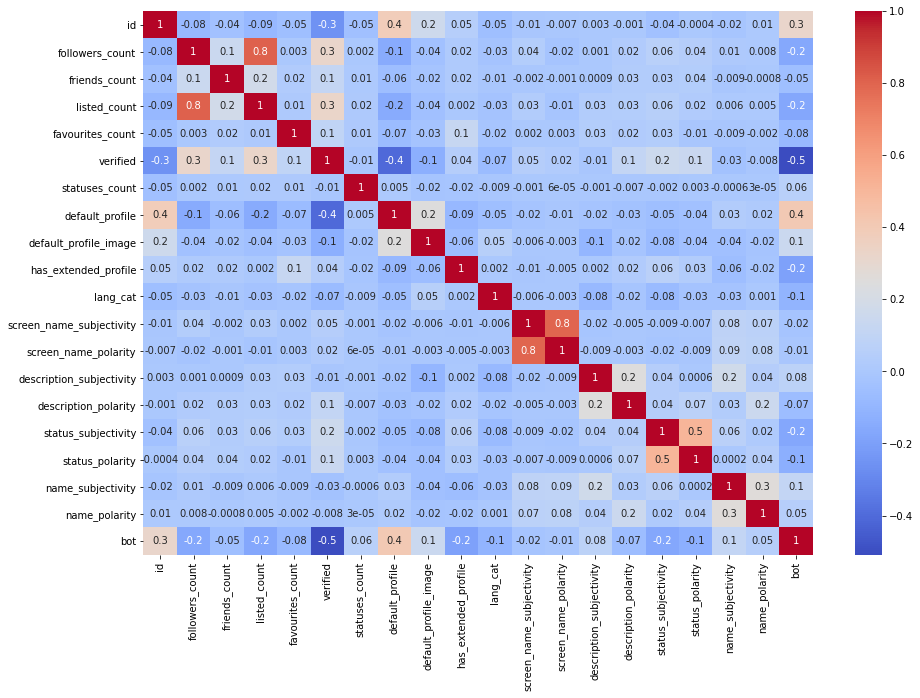

In [36]:
# Compute correlation among the features and the response variable
corr = df.corr()

fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot = True, fmt='.1g', cmap= 'coolwarm')

### Feature Selection

We will perform below feature selection methods:

1. Chi Squared
2. Recursive Feature Elimination (RFE)
3. Random Forest
4. L1 based feature selection

We will perform each of the feature selection method and than perform classification before and after feature selection. 


In [37]:
#Import Feature selection libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score,make_scorer,roc_curve
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.svm import SVC

In [38]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [39]:
#Split data to train and test. 20% test data
#We need to split before performing feature selection to avoid train data leakage
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [40]:
#Function to plot feature importance
def bar_plot(X,y,xlabel,ylabel,title,fs=20):
    df = pd.DataFrame({"Feature": X,
                   "Importance": y})
    
    
    plt.figure(figsize=(fs,8))
    ax = sns.barplot(x="Feature", y="Importance", data=df, palette=sns.color_palette("GnBu", 10), order=df.sort_values('Importance').Feature)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

**Chi Selection**

In [41]:
X_norm = MinMaxScaler().fit_transform(X_train)
chi_selector = SelectKBest(chi2)
chi_selector.fit(X_norm, y_train)
chi_support = chi_selector.get_support()
chi_feature = X_train.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

10 selected features


In [42]:
X_train.loc[:,chi_support].columns

Index(['followers_count', 'listed_count', 'favourites_count', 'verified',
       'default_profile', 'default_profile_image', 'has_extended_profile',
       'description_subjectivity', 'status_subjectivity', 'name_subjectivity'],
      dtype='object')

In [43]:
feature_scores=[]
for i,j in zip(chi_support,chi_selector.scores_): #scores_ gives the score identified by chi square.
    if i:
        feature_scores.append(j)

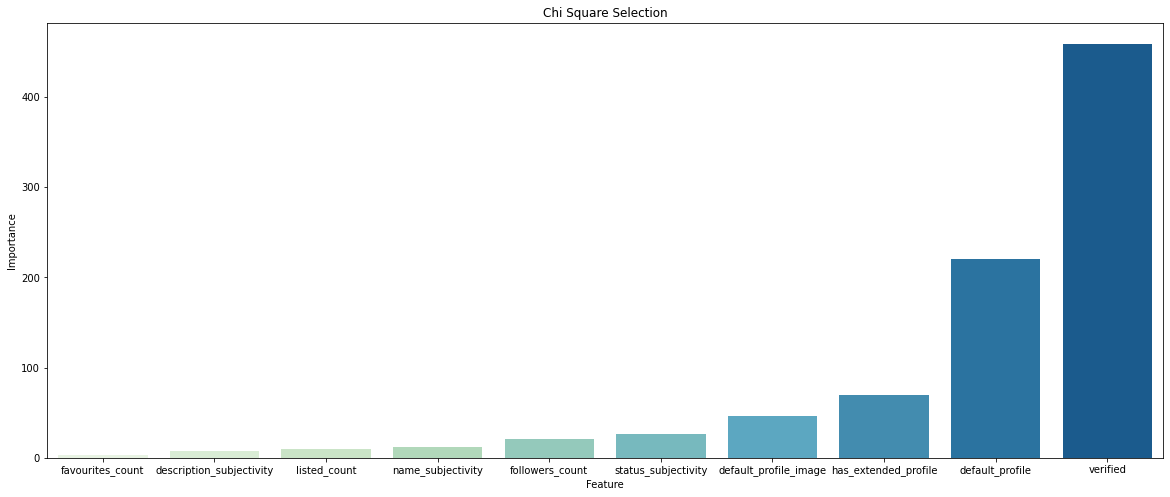

In [44]:
bar_plot(chi_feature,feature_scores,'Feature','Importance','Chi Square Selection')

In [45]:
#Below are selected Features
chi_feature

['followers_count',
 'listed_count',
 'favourites_count',
 'verified',
 'default_profile',
 'default_profile_image',
 'has_extended_profile',
 'description_subjectivity',
 'status_subjectivity',
 'name_subjectivity']

**Recurisve Feature Elimination**

In [46]:
rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select =10, step=10, verbose=5)
rfe_selector.fit(X_norm, y_train)

rfe_support = rfe_selector.get_support()
rfe_feature = X_train.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 18 features.
10 selected features


In [47]:
rfe_feature

['verified',
 'statuses_count',
 'default_profile',
 'has_extended_profile',
 'lang_cat',
 'description_subjectivity',
 'status_subjectivity',
 'status_polarity',
 'name_subjectivity',
 'name_polarity']

In [48]:
feature_ranking=[]
for i,j in zip(rfe_support,rfe_selector.ranking_): #scores_ gives the score identified by chi square.
    if i:
        feature_ranking.append(j)

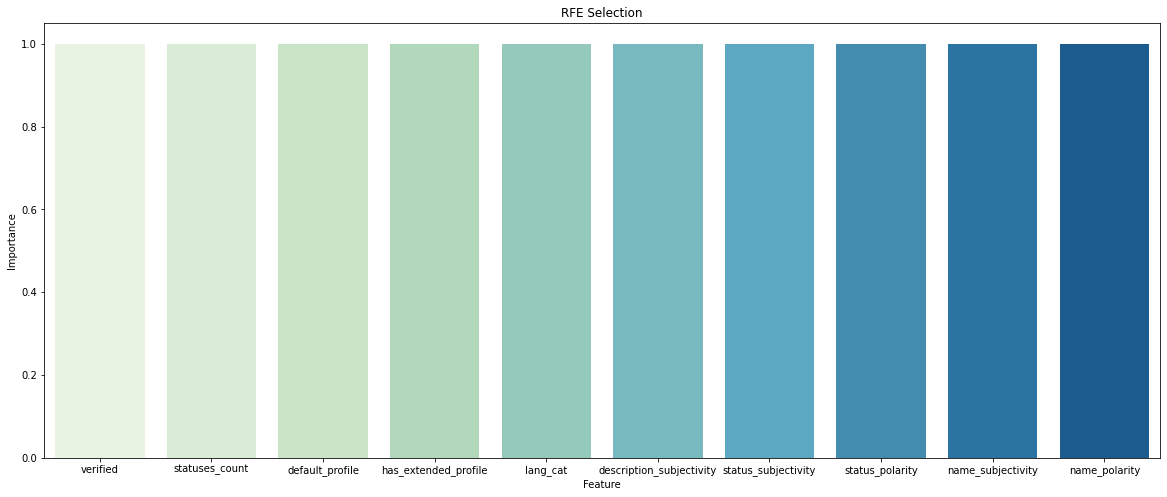

In [49]:
bar_plot(rfe_feature,feature_ranking,'Feature','Importance','RFE Selection')

**L1 Based Selection**

In [50]:
#reference : https://scikit-learn.org/stable/modules/feature_selection.html

from sklearn.svm import LinearSVC

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_norm, y_train)
model = SelectFromModel(lsvc, prefit=True,max_features=10)

embeded_lr_support = model.get_support()
embeded_lasso_feature = X_train.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lasso_feature)), 'selected features')

5 selected features


In [51]:
importance = np.abs(lsvc.coef_)
print(importance)

[[0.         0.         0.         0.         0.88393356 0.
  0.45310011 0.         0.30954928 0.         0.         0.
  0.02279707 0.         0.0954817  0.         0.         0.        ]]


In [52]:
feature_imp_l1=[]
for i,j in zip(embeded_lr_support,lsvc.coef_[0]): #scores_ gives the score identified by chi square.
    if i:
        feature_imp_l1.append(j)

In [53]:
feature_imp_l1

[-0.8839335636686699,
 0.45310011280118284,
 -0.30954927886102146,
 0.022797066031401934,
 -0.0954816973235601]

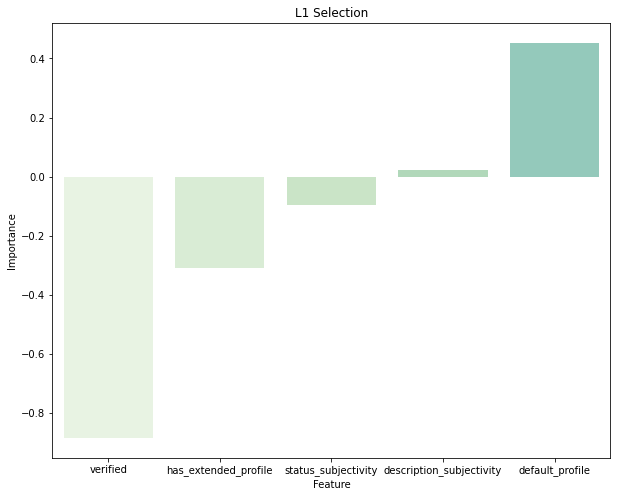

In [54]:
bar_plot(embeded_lasso_feature,feature_imp_l1,'Feature','Importance','L1 Selection',10)

### Negative coefficients says that these features helps in predicting class 0 i.e account is not bot.

In [55]:
embeded_lasso_feature

['verified',
 'default_profile',
 'has_extended_profile',
 'description_subjectivity',
 'status_subjectivity']

**Random Forest Selection**

In [56]:
rf=RandomForestClassifier(n_estimators=100).fit(X_norm, y_train)
embeded_rf_selector = SelectFromModel(rf,prefit=True)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

6 selected features


In [57]:
rf.feature_importances_

array([0.09380128, 0.24095371, 0.10671927, 0.14347778, 0.09803596,
       0.1173002 , 0.04800711, 0.00822476, 0.01587857, 0.01819466,
       0.        , 0.        , 0.01988493, 0.01879709, 0.0317967 ,
       0.02923134, 0.00434644, 0.0053502 ])

In [58]:
feature_imp_rf=[]
for i,j in zip(embeded_rf_support,rf.feature_importances_): 
    if i:
        feature_imp_rf.append(j)

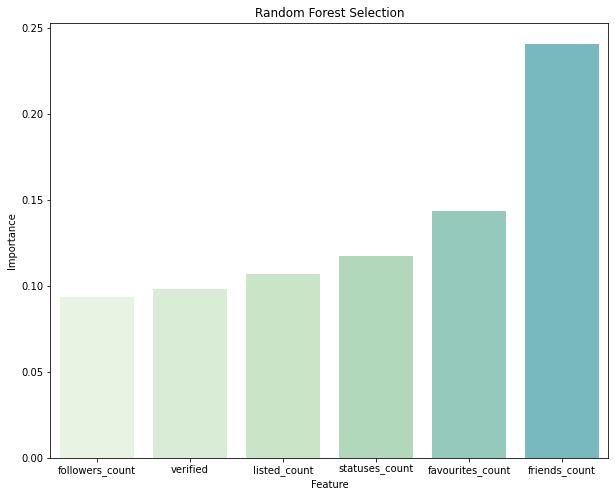

In [59]:
bar_plot(embeded_rf_feature,feature_imp_rf,'Feature','Importance','Random Forest Selection',10)

In [60]:
embeded_rf_feature

['followers_count',
 'friends_count',
 'listed_count',
 'favourites_count',
 'verified',
 'statuses_count']

## Classification

1. We will use below 4 classification models:

    1. Random Forest
    2. Logistic Regression
    3. Naive Bayes Classifier
    4. Support Vector Machine

2. We will do performance evaluation for each before feature selection

3. We will run all the above 4 models for each of the feature selection method defined in previous section.

4. Show comparion among methods


In [61]:
#List containg feature selection methods
fs_methods=['chi','rfe','l1','rf']

#List with names of list containg selected features by each method
master_list=['chi_feature','rfe_feature','embeded_lasso_feature','embeded_rf_feature']

In [62]:
list_name=master_list[0]

In [63]:
#Create data frame to store accuracy of all the methods
df_scores=pd.DataFrame(columns=['Chi','RFE','l1','Random_Forest','All_Features'],index=['Random_Forest','Logistic_Regression','NB','SVM'])

In [64]:
#Function to perform evaluation for a model
def performance_check(y_test,y_pred,model,X_test):
    print("Accuracy score:",accuracy_score(y_test,y_pred))
    print(f"Sensitivity is: {recall_score(y_test,y_pred):.3f}")
    print(f"Precision is: {precision_score(y_test,y_pred):.3f}")
    print(f"F1 Score is: {f1_score(y_test,y_pred):.3f}")
    print()
    #Confusion Matrix
    confmat=pd.DataFrame(confusion_matrix(y_test,y_pred),index=['True[0]','True[1]'],columns=['Predict[0]','Predict[1]'])
    print(confmat)
    
    print("\nClassification Report")
    print(classification_report(y_test,y_pred))
    #ROC curve with all the classes
    skplt.metrics.plot_roc(y_test,model.predict_proba(X_test),plot_micro=False)
    plt.show()
    
    #Cummulative Gain Chart

    skplt.metrics.plot_cumulative_gain(y_test,model.predict_proba(X_test))

    plt.show()
    
    #Lift Curve
    skplt.metrics.plot_lift_curve(y_test,model.predict_proba(X_test))
    plt.show()
    
    return round(model.score(X_test, y_test), 2)

In [65]:
#Function to create different models based on the parameter passed
def model_develp(model,X_train,X_test,y_test,per_check='Y'): #pass final train and test data
    if model=='Random_Forest':
        #perform random forest classification
        db_model=RandomForestClassifier(n_estimators=500,random_state=1)
    elif model=='Logistic_Regression':
        #perform Logistic Regression classification
        db_model=LogisticRegression(random_state=1)
    elif model=='Naive_bayes':
        #perform Naive Bayes classification
        db_model=GaussianNB()
    elif model=='SVM':
        #perform SVM classification
        db_model=SVC(kernel='rbf', random_state=1,probability =True)
  
    db_model.fit(X_train,y_train)
    y_pred=db_model.predict(X_test)
    
    if per_check=='Y':
        score=performance_check(y_test,y_pred,db_model,X_test)
    else:
        score=round(db_model.score(X_test, y_test), 2)
    return score

Random Forest with Features selected using Chi Squared:

Accuracy score: 0.8553571428571428
Sensitivity is: 0.848
Precision is: 0.845
F1 Score is: 0.847

         Predict[0]  Predict[1]
True[0]         255          41
True[1]          40         224

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       296
           1       0.85      0.85      0.85       264

    accuracy                           0.86       560
   macro avg       0.85      0.85      0.85       560
weighted avg       0.86      0.86      0.86       560



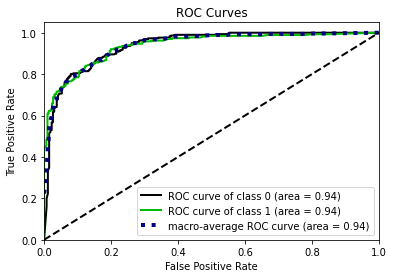

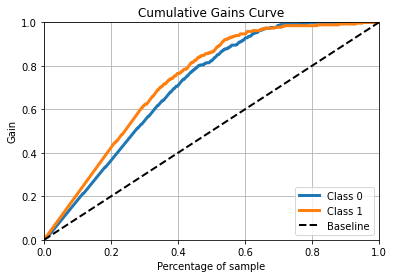

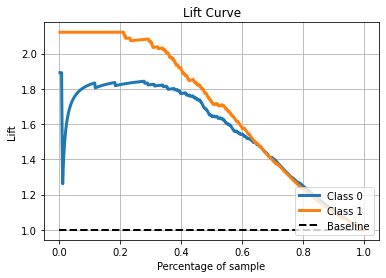

Score is  0.86
--------------------------------------------------------------------------------------
Random Forest with Features selected using RFE:

Accuracy score: 0.7589285714285714
Sensitivity is: 0.799
Precision is: 0.720
F1 Score is: 0.758

         Predict[0]  Predict[1]
True[0]         214          82
True[1]          53         211

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       296
           1       0.72      0.80      0.76       264

    accuracy                           0.76       560
   macro avg       0.76      0.76      0.76       560
weighted avg       0.76      0.76      0.76       560



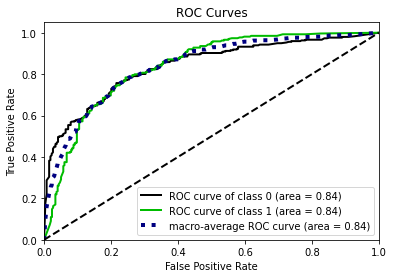

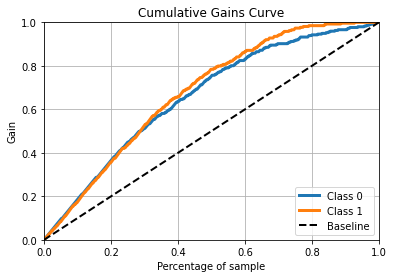

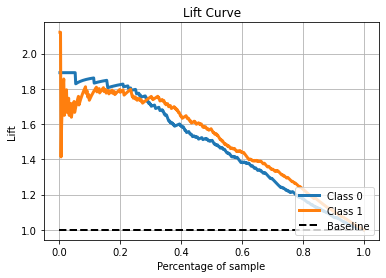

--------------------------------------------------------------------------------------
Random Forest with Features selected using L1 Selection:

Accuracy score: 0.7107142857142857
Sensitivity is: 0.705
Precision is: 0.689
F1 Score is: 0.697

         Predict[0]  Predict[1]
True[0]         212          84
True[1]          78         186

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       296
           1       0.69      0.70      0.70       264

    accuracy                           0.71       560
   macro avg       0.71      0.71      0.71       560
weighted avg       0.71      0.71      0.71       560



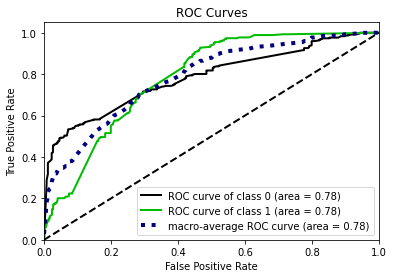

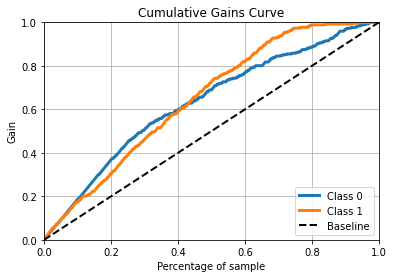

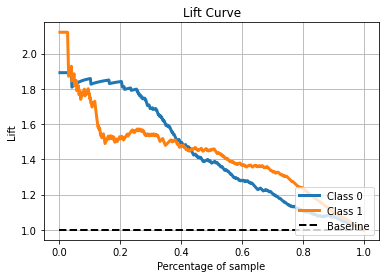

--------------------------------------------------------------------------------------
Random Forest with Features selected using Random Forest:

Accuracy score: 0.8857142857142857
Sensitivity is: 0.864
Precision is: 0.891
F1 Score is: 0.877

         Predict[0]  Predict[1]
True[0]         268          28
True[1]          36         228

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       296
           1       0.89      0.86      0.88       264

    accuracy                           0.89       560
   macro avg       0.89      0.88      0.89       560
weighted avg       0.89      0.89      0.89       560



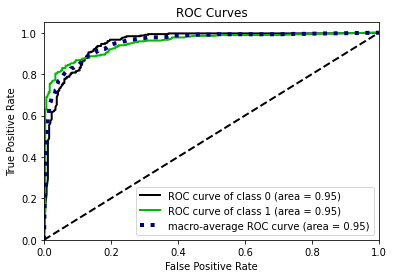

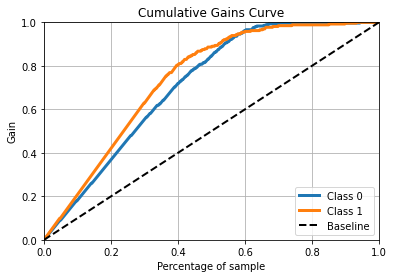

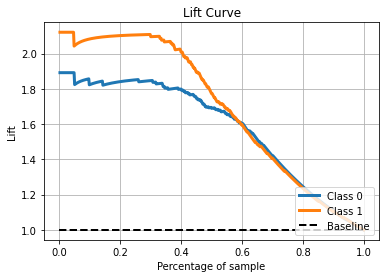

--------------------------------------------------------------------------------------


In [66]:
for m in fs_methods:
    if m=='chi':
        X_train_sf=X_train[chi_feature]
        print("Random Forest with Features selected using Chi Squared:\n")
        X_test_sf=X_test[chi_feature]
        score=model_develp('Random_Forest',X_train_sf,X_test_sf,y_test,'Y')
        print("Score is ",score)
        df_scores.at['Random_Forest', 'Chi'] = score
        print('--------------------------------------------------------------------------------------')
    elif m=='rfe':
        X_train_sf=X_train[rfe_feature]
        print("Random Forest with Features selected using RFE:\n")
        X_test_sf=X_test[rfe_feature]
        score=model_develp('Random_Forest',X_train_sf,X_test_sf,y_test,'Y')
        df_scores.at['Random_Forest', 'RFE'] = score
        print('--------------------------------------------------------------------------------------')
    elif m=='l1':
        X_train_sf=X_train[embeded_lasso_feature]
        print("Random Forest with Features selected using L1 Selection:\n")
        X_test_sf=X_test[embeded_lasso_feature]
        score=model_develp('Random_Forest',X_train_sf,X_test_sf,y_test,'Y')
        df_scores.at['Random_Forest', 'l1'] = score
        print('--------------------------------------------------------------------------------------')
    elif m=='rf':
        X_train_sf=X_train[embeded_rf_feature]
        print("Random Forest with Features selected using Random Forest:\n")
        X_test_sf=X_test[embeded_rf_feature]
        score=model_develp('Random_Forest',X_train_sf,X_test_sf,y_test,'Y')
        df_scores.at['Random_Forest', 'Random_Forest'] = score
        print('--------------------------------------------------------------------------------------')

Logistic Regression with Features selected using Chi Squared:

Accuracy score: 0.7285714285714285
Sensitivity is: 0.886
Precision is: 0.657
F1 Score is: 0.755

         Predict[0]  Predict[1]
True[0]         174         122
True[1]          30         234

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.59      0.70       296
           1       0.66      0.89      0.75       264

    accuracy                           0.73       560
   macro avg       0.76      0.74      0.73       560
weighted avg       0.76      0.73      0.72       560



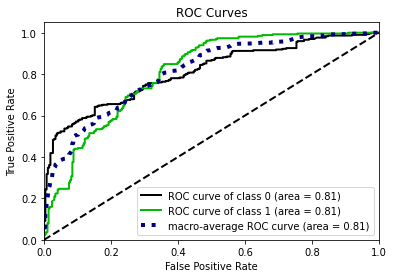

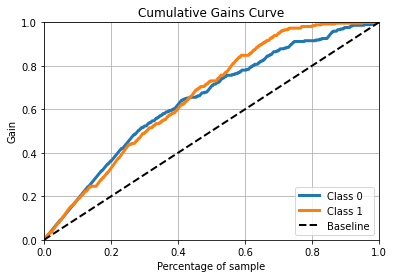

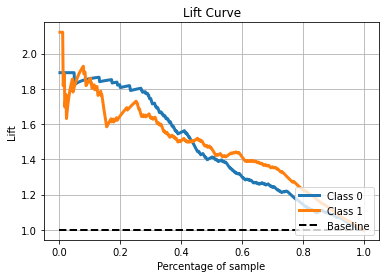

Score is  0.73
--------------------------------------------------------------------------------------
Logistic Regression with Features selected using RFE:

Accuracy score: 0.7535714285714286
Sensitivity is: 0.871
Precision is: 0.689
F1 Score is: 0.769

         Predict[0]  Predict[1]
True[0]         192         104
True[1]          34         230

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.65      0.74       296
           1       0.69      0.87      0.77       264

    accuracy                           0.75       560
   macro avg       0.77      0.76      0.75       560
weighted avg       0.77      0.75      0.75       560



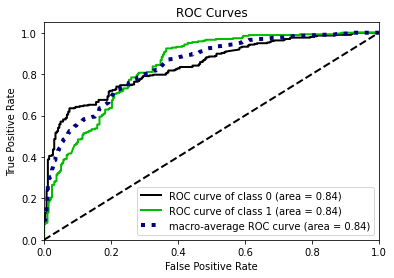

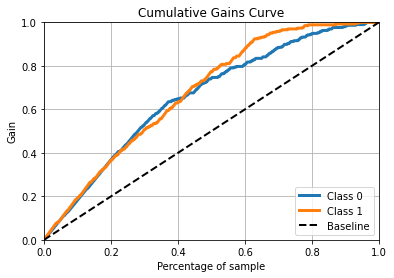

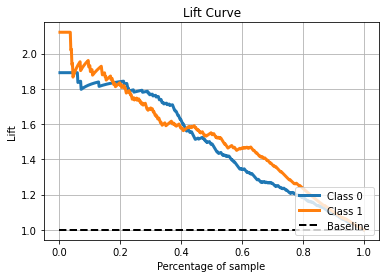

Score is  0.75
--------------------------------------------------------------------------------------
Logistic Regression with Features selected using L1:

Accuracy score: 0.7232142857142857
Sensitivity is: 0.894
Precision is: 0.650
F1 Score is: 0.753

         Predict[0]  Predict[1]
True[0]         169         127
True[1]          28         236

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.57      0.69       296
           1       0.65      0.89      0.75       264

    accuracy                           0.72       560
   macro avg       0.75      0.73      0.72       560
weighted avg       0.76      0.72      0.72       560



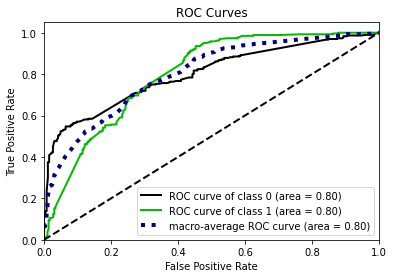

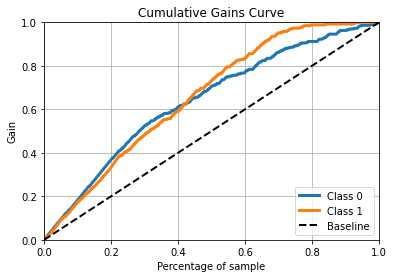

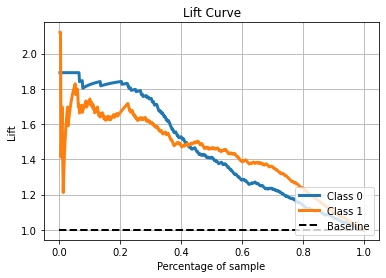

Score is  0.72
--------------------------------------------------------------------------------------
Logistic Regression with Features selected using Random forest selector:

Accuracy score: 0.6839285714285714
Sensitivity is: 0.970
Precision is: 0.602
F1 Score is: 0.743

         Predict[0]  Predict[1]
True[0]         127         169
True[1]           8         256

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.43      0.59       296
           1       0.60      0.97      0.74       264

    accuracy                           0.68       560
   macro avg       0.77      0.70      0.67       560
weighted avg       0.78      0.68      0.66       560



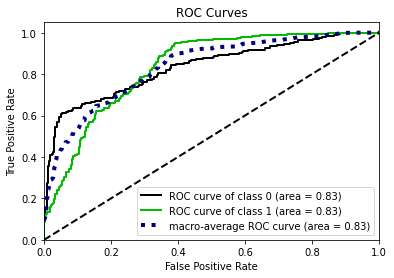

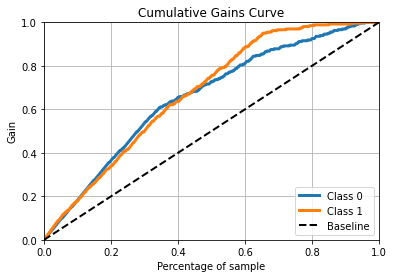

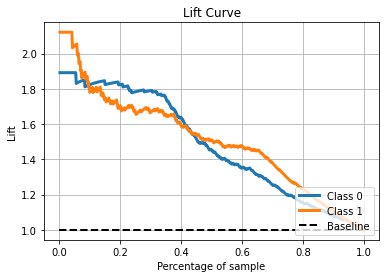

Score is  0.68
--------------------------------------------------------------------------------------


In [67]:
#Logistic regression
for m in fs_methods:
    if m=='chi':
        X_train_sf=X_train[chi_feature]
        print("Logistic Regression with Features selected using Chi Squared:\n")
        X_test_sf=X_test[chi_feature]
        score=model_develp('Logistic_Regression',X_train_sf,X_test_sf,y_test,'Y')
        print("Score is ",score)
        df_scores.at['Logistic_Regression', 'Chi'] = score
        print('--------------------------------------------------------------------------------------')
    elif m=='rfe':
        X_train_sf=X_train[rfe_feature]
        print("Logistic Regression with Features selected using RFE:\n")
        X_test_sf=X_test[rfe_feature]
        score=model_develp('Logistic_Regression',X_train_sf,X_test_sf,y_test,'Y')
        print("Score is ",score)
        df_scores.at['Logistic_Regression', 'RFE'] = score
        print('--------------------------------------------------------------------------------------')
    elif m=='l1':
        X_train_sf=X_train[embeded_lasso_feature]
        print("Logistic Regression with Features selected using L1:\n")
        X_test_sf=X_test[embeded_lasso_feature]
        score=model_develp('Logistic_Regression',X_train_sf,X_test_sf,y_test,'Y')
        print("Score is ",score)
        df_scores.at['Logistic_Regression', 'l1'] = score
        print('--------------------------------------------------------------------------------------')
    elif m=='rf':
        X_train_sf=X_train[embeded_rf_feature]
        print("Logistic Regression with Features selected using Random forest selector:\n")
        X_test_sf=X_test[embeded_rf_feature]
        score=model_develp('Logistic_Regression',X_train_sf,X_test_sf,y_test,'Y')
        print("Score is ",score)
        df_scores.at['Logistic_Regression', 'Random_Forest'] = score
        print('--------------------------------------------------------------------------------------')
    

Naive Bayes with Features selected using Chi Squared:

Accuracy score: 0.675
Sensitivity is: 0.966
Precision is: 0.596
F1 Score is: 0.737

         Predict[0]  Predict[1]
True[0]         123         173
True[1]           9         255

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.42      0.57       296
           1       0.60      0.97      0.74       264

    accuracy                           0.68       560
   macro avg       0.76      0.69      0.66       560
weighted avg       0.77      0.68      0.65       560



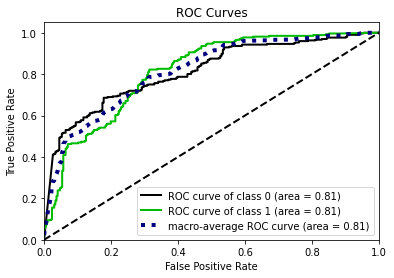

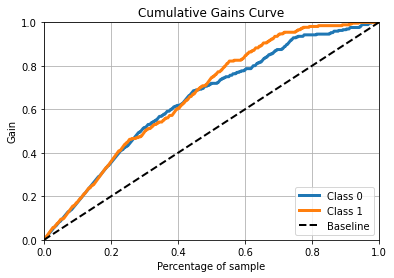

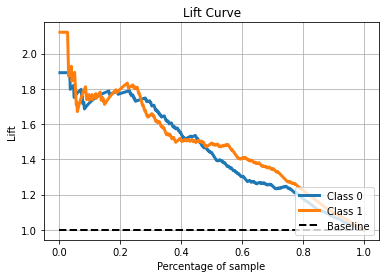

Score is  0.68
--------------------------------------------------------------------------------------
Naive Bayes with Features selected using RFE:

Accuracy score: 0.7482142857142857
Sensitivity is: 0.856
Precision is: 0.687
F1 Score is: 0.762

         Predict[0]  Predict[1]
True[0]         193         103
True[1]          38         226

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.65      0.73       296
           1       0.69      0.86      0.76       264

    accuracy                           0.75       560
   macro avg       0.76      0.75      0.75       560
weighted avg       0.77      0.75      0.75       560



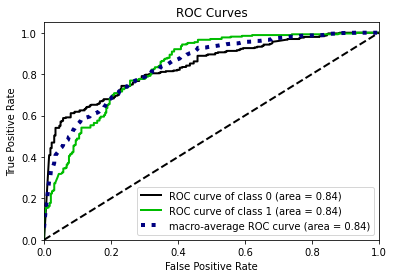

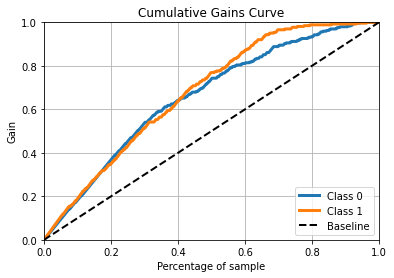

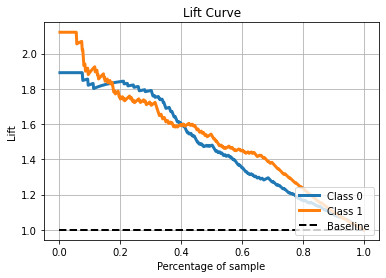

Score is  0.75
--------------------------------------------------------------------------------------
Naive Bayes with Features selected using L1 Based feature Selection:

Accuracy score: 0.7214285714285714
Sensitivity is: 0.936
Precision is: 0.640
F1 Score is: 0.760

         Predict[0]  Predict[1]
True[0]         157         139
True[1]          17         247

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.53      0.67       296
           1       0.64      0.94      0.76       264

    accuracy                           0.72       560
   macro avg       0.77      0.73      0.71       560
weighted avg       0.78      0.72      0.71       560



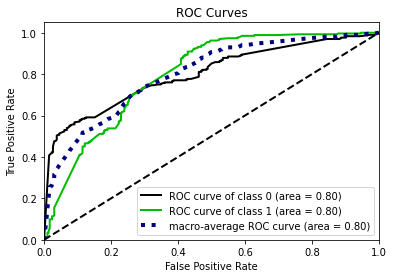

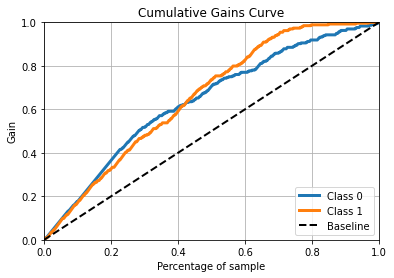

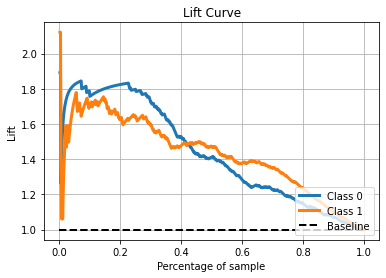

--------------------------------------------------------------------------------------
Naive Bayes with Features selected using Random Forest feature Selection:

Accuracy score: 0.6732142857142858
Sensitivity is: 0.962
Precision is: 0.595
F1 Score is: 0.735

         Predict[0]  Predict[1]
True[0]         123         173
True[1]          10         254

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.42      0.57       296
           1       0.59      0.96      0.74       264

    accuracy                           0.67       560
   macro avg       0.76      0.69      0.65       560
weighted avg       0.77      0.67      0.65       560



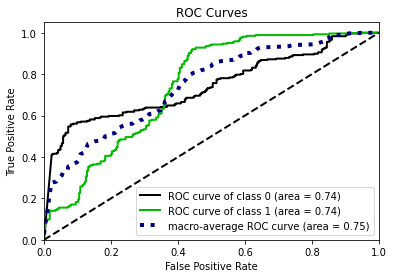

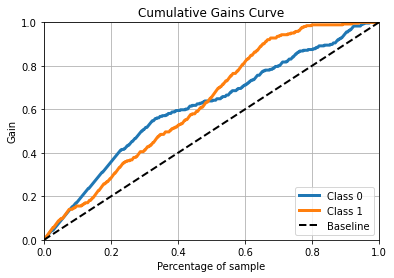

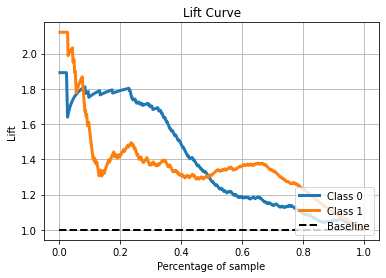

--------------------------------------------------------------------------------------


In [68]:
#Naive Bayes Classification
for m in fs_methods:
    if m=='chi':
        X_train_sf=X_train[chi_feature]
        print("Naive Bayes with Features selected using Chi Squared:\n")
        X_test_sf=X_test[chi_feature]
        score=model_develp('Naive_bayes',X_train_sf,X_test_sf,y_test,'Y')
        print("Score is ",score)
        
        df_scores.at['NB', 'Chi'] = score
        print('--------------------------------------------------------------------------------------')
    elif m=='rfe':
        X_train_sf=X_train[rfe_feature]
        print("Naive Bayes with Features selected using RFE:\n")
        X_test_sf=X_test[rfe_feature]
        score=model_develp('Naive_bayes',X_train_sf,X_test_sf,y_test,'Y')
        print("Score is ",score)
        df_scores.at['NB', 'RFE'] = score
        print('--------------------------------------------------------------------------------------')
    elif m=='l1':
        X_train_sf=X_train[embeded_lasso_feature]
        print("Naive Bayes with Features selected using L1 Based feature Selection:\n")
        X_test_sf=X_test[embeded_lasso_feature]
        score=model_develp('Naive_bayes',X_train_sf,X_test_sf,y_test,'Y')
        df_scores.at['NB', 'l1'] = score
        print('--------------------------------------------------------------------------------------')
    elif m=='rf':
        X_train_sf=X_train[embeded_rf_feature]
        print("Naive Bayes with Features selected using Random Forest feature Selection:\n")
        X_test_sf=X_test[embeded_rf_feature]
        score=model_develp('Naive_bayes',X_train_sf,X_test_sf,y_test,'Y')
        df_scores.at['NB', 'Random_Forest'] = score
        print('--------------------------------------------------------------------------------------')
    

Support Vector Machine with Features selected using Chi Squared:

Accuracy score: 0.7392857142857143
Sensitivity is: 0.928
Precision is: 0.659
F1 Score is: 0.770

         Predict[0]  Predict[1]
True[0]         169         127
True[1]          19         245

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.57      0.70       296
           1       0.66      0.93      0.77       264

    accuracy                           0.74       560
   macro avg       0.78      0.75      0.73       560
weighted avg       0.79      0.74      0.73       560



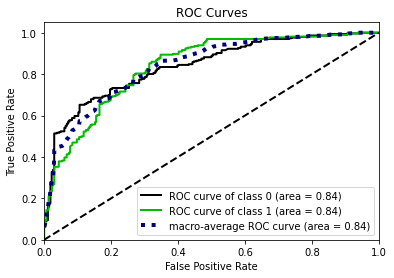

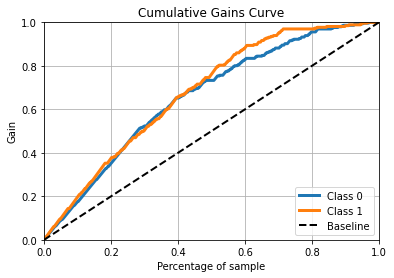

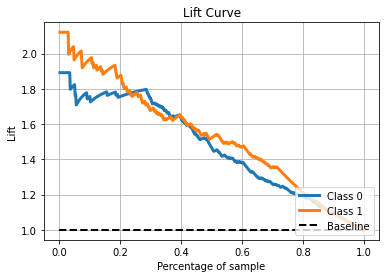

Score is  0.74
--------------------------------------------------------------------------------------
Support Vector Machine with Features selected using RFE:

Accuracy score: 0.7482142857142857
Sensitivity is: 0.928
Precision is: 0.668
F1 Score is: 0.777

         Predict[0]  Predict[1]
True[0]         174         122
True[1]          19         245

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.59      0.71       296
           1       0.67      0.93      0.78       264

    accuracy                           0.75       560
   macro avg       0.78      0.76      0.74       560
weighted avg       0.79      0.75      0.74       560



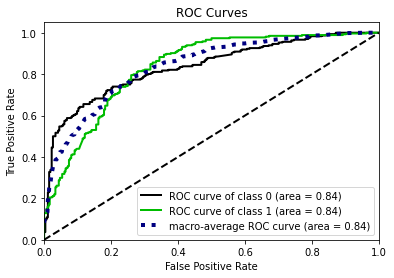

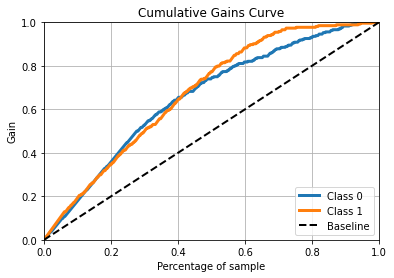

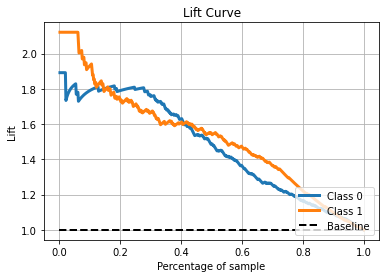

--------------------------------------------------------------------------------------
Support Vector Machine with Features selected using L1 based feature Selection:

Accuracy score: 0.7267857142857143
Sensitivity is: 0.765
Precision is: 0.689
F1 Score is: 0.725

         Predict[0]  Predict[1]
True[0]         205          91
True[1]          62         202

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       296
           1       0.69      0.77      0.73       264

    accuracy                           0.73       560
   macro avg       0.73      0.73      0.73       560
weighted avg       0.73      0.73      0.73       560



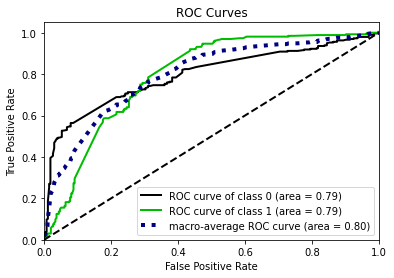

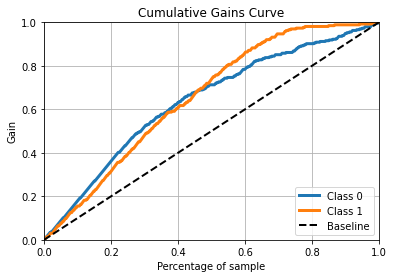

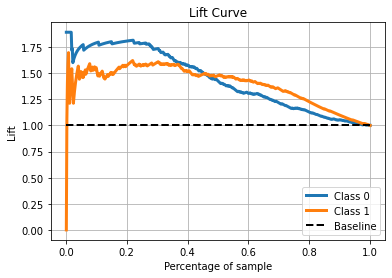

--------------------------------------------------------------------------------------
Support Vector Machine with Features selected using Random Forest feature Selection:

Accuracy score: 0.7017857142857142
Sensitivity is: 0.958
Precision is: 0.619
F1 Score is: 0.752

         Predict[0]  Predict[1]
True[0]         140         156
True[1]          11         253

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.47      0.63       296
           1       0.62      0.96      0.75       264

    accuracy                           0.70       560
   macro avg       0.77      0.72      0.69       560
weighted avg       0.78      0.70      0.69       560



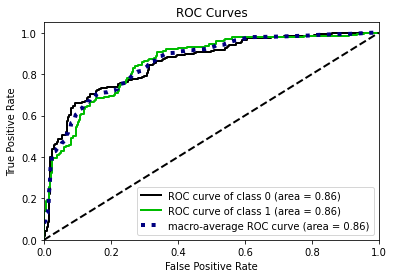

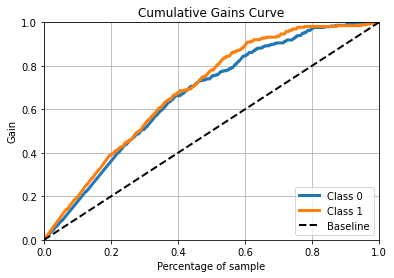

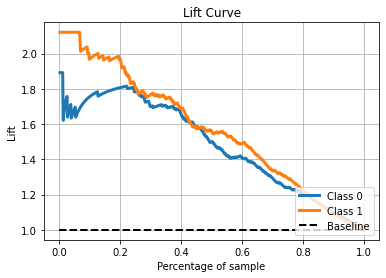

--------------------------------------------------------------------------------------


In [69]:
#SVM classification
for m in fs_methods:
    if m=='chi':
        X_train_sf=X_train[chi_feature]
        print("Support Vector Machine with Features selected using Chi Squared:\n")
        X_test_sf=X_test[chi_feature]
        score=model_develp('SVM',X_train_sf,X_test_sf,y_test,'Y')
        print("Score is ",score)
        df_scores.at['SVM', 'Chi'] = score
        print('--------------------------------------------------------------------------------------')
    elif m=='rfe':
        X_train_sf=X_train[rfe_feature]
        print("Support Vector Machine with Features selected using RFE:\n")
        X_test_sf=X_test[rfe_feature]
        score=model_develp('SVM',X_train_sf,X_test_sf,y_test,'Y')
        df_scores.at['SVM', 'RFE'] = score
        print('--------------------------------------------------------------------------------------')
    elif m=='l1':
        X_train_sf=X_train[embeded_lasso_feature]
        print("Support Vector Machine with Features selected using L1 based feature Selection:\n")
        X_test_sf=X_test[embeded_lasso_feature]
        score=model_develp('SVM',X_train_sf,X_test_sf,y_test,'Y')
        df_scores.at['SVM', 'l1'] = score
        print('--------------------------------------------------------------------------------------')
    elif m=='rf':
        X_train_sf=X_train[embeded_rf_feature]
        print("Support Vector Machine with Features selected using Random Forest feature Selection:\n")
        X_test_sf=X_test[embeded_rf_feature]
        score=model_develp('SVM',X_train_sf,X_test_sf,y_test,'Y')
        df_scores.at['SVM', 'Random_Forest'] = score
        print('--------------------------------------------------------------------------------------')
    

In [70]:
df_scores

,Chi,RFE,l1,Random_Forest,All_Features
Random_Forest,0.86,0.76,0.71,0.89,NaN
Logistic_Regression,0.73,0.75,0.72,0.68,NaN
NB,0.68,0.75,0.72,0.67,NaN
SVM,0.74,0.75,0.73,0.7,NaN


### Classification on all the features

Accuracy score: 0.8946428571428572
Sensitivity is: 0.875
Precision is: 0.899
F1 Score is: 0.887

         Predict[0]  Predict[1]
True[0]         270          26
True[1]          33         231

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       296
           1       0.90      0.88      0.89       264

    accuracy                           0.89       560
   macro avg       0.89      0.89      0.89       560
weighted avg       0.89      0.89      0.89       560



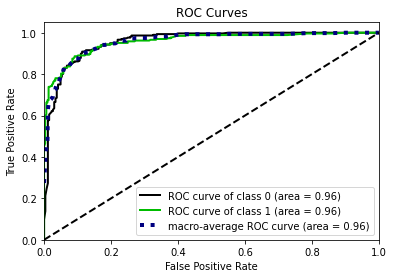

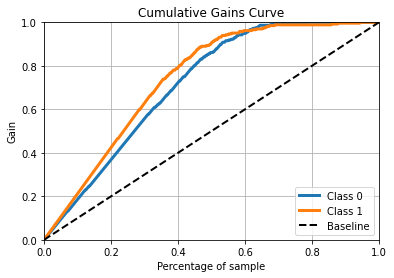

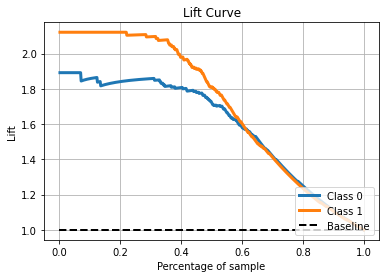

Score is  0.89


In [71]:
score=model_develp('Random_Forest',X_train,X_test,y_test,'Y')
print("Score is ",score)
df_scores.at['Random_Forest', 'All_Features'] = score

Accuracy score: 0.7535714285714286
Sensitivity is: 0.871
Precision is: 0.689
F1 Score is: 0.769

         Predict[0]  Predict[1]
True[0]         192         104
True[1]          34         230

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.65      0.74       296
           1       0.69      0.87      0.77       264

    accuracy                           0.75       560
   macro avg       0.77      0.76      0.75       560
weighted avg       0.77      0.75      0.75       560



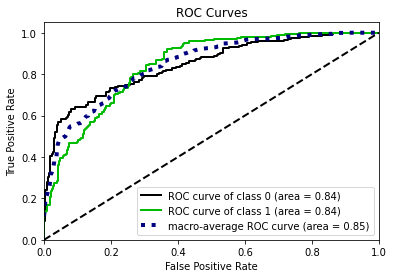

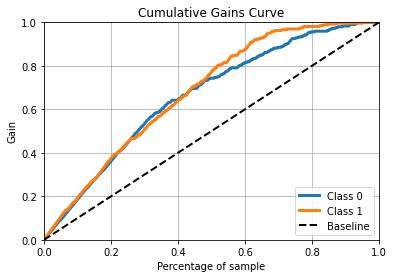

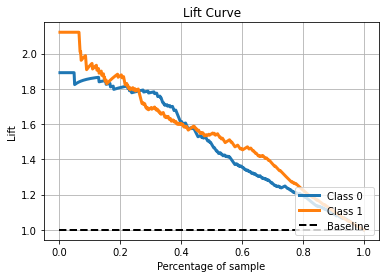

Score is  0.75


In [72]:
score=model_develp('Logistic_Regression',X_train,X_test,y_test,'Y')
print("Score is ",score)
df_scores.at['Logistic_Regression', 'All_Features'] = score

Accuracy score: 0.7017857142857142
Sensitivity is: 0.955
Precision is: 0.619
F1 Score is: 0.751

         Predict[0]  Predict[1]
True[0]         141         155
True[1]          12         252

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.48      0.63       296
           1       0.62      0.95      0.75       264

    accuracy                           0.70       560
   macro avg       0.77      0.72      0.69       560
weighted avg       0.78      0.70      0.69       560



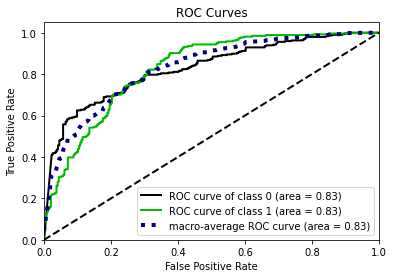

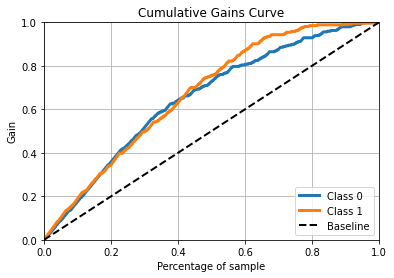

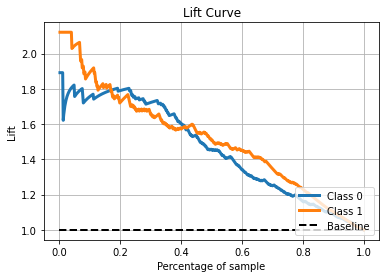

Score is  0.7


In [73]:
score=model_develp('Naive_bayes',X_train,X_test,y_test,'Y')
print("Score is ",score)
df_scores.at['NB', 'All_Features'] = score

Accuracy score: 0.7017857142857142
Sensitivity is: 0.955
Precision is: 0.619
F1 Score is: 0.751

         Predict[0]  Predict[1]
True[0]         141         155
True[1]          12         252

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.48      0.63       296
           1       0.62      0.95      0.75       264

    accuracy                           0.70       560
   macro avg       0.77      0.72      0.69       560
weighted avg       0.78      0.70      0.69       560



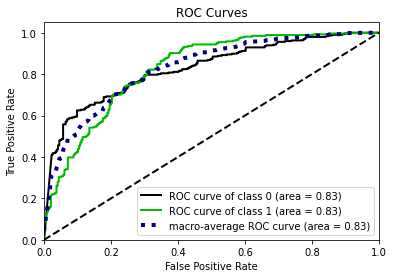

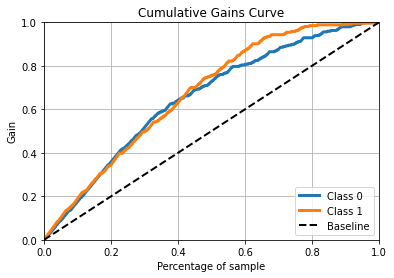

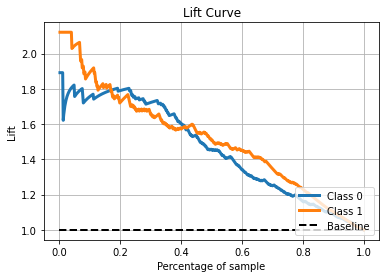

Score is  0.7


In [74]:
score=model_develp('Naive_bayes',X_train,X_test,y_test,'Y')
print("Score is ",score)
df_scores.at['SVM', 'All_Features'] = score

In [75]:
df_scores

,Chi,RFE,l1,Random_Forest,All_Features
Random_Forest,0.86,0.76,0.71,0.89,0.89
Logistic_Regression,0.73,0.75,0.72,0.68,0.75
NB,0.68,0.75,0.72,0.67,0.7
SVM,0.74,0.75,0.73,0.7,0.7


In [76]:
df_scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Random_Forest to SVM
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Chi            4 non-null      object
 1   RFE            4 non-null      object
 2   l1             4 non-null      object
 3   Random_Forest  4 non-null      object
 4   All_Features   4 non-null      object
dtypes: object(5)
memory usage: 352.0+ bytes


In [77]:
df_scores= df_scores.astype(float)

Text(0.5, 1.0, 'Accuracy Score Comparison')

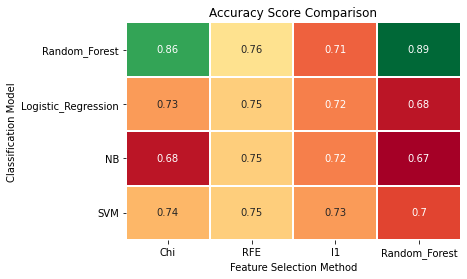

In [78]:
# Displaying dataframe as an heatmap 
sns.heatmap(df_scores.iloc[:,:-1], cmap ='RdYlGn', linewidths = 0.30,  annot = True,cbar=False)

plt.xlabel("Feature Selection Method") 
plt.ylabel("Classification Model")
plt.title("Accuracy Score Comparison")

Text(0, 0.5, 'Accuracy Score')

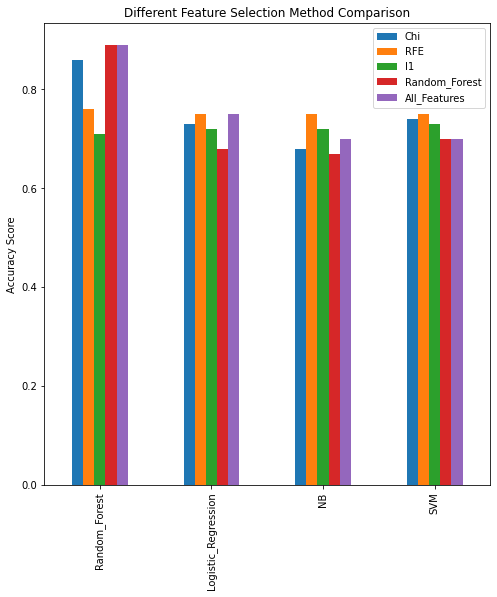

In [79]:

df_scores.plot(kind="bar",figsize=(8,8.5))

plt.title("Different Feature Selection Method Comparison")
plt.legend(loc='best')

plt.ylabel("Accuracy Score")

### Random Forest is best method for our problem for feature selection and classification

In [80]:
rf=RandomForestClassifier(n_estimators=500).fit(X_norm, y_train)
embeded_rf_selector = SelectFromModel(rf,prefit=True)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

6 selected features


In [81]:
embeded_rf_feature

['followers_count',
 'friends_count',
 'listed_count',
 'favourites_count',
 'verified',
 'statuses_count']

## Tuning Random Forest Model

In [82]:
#Final random forest model with and without selected features
rf_model=RandomForestClassifier(n_estimators=600,random_state=1,criterion='entropy', max_depth=40,min_samples_leaf=5)

In [83]:
X_train_new=X_train[embeded_rf_feature]
X_test_new=X_test[embeded_rf_feature]

In [84]:
rf_model.fit(X_train_new,y_train)

RandomForestClassifier(criterion='entropy', max_depth=40, min_samples_leaf=5,
                       n_estimators=600, random_state=1)

In [85]:
y_pred_rf=rf_model.predict(X_test_new)

In [86]:
print("Score ",round(rf_model.score(X_test_new, y_test), 2))

Score  0.9


Accuracy score: 0.8964285714285715
Sensitivity is: 0.867
Precision is: 0.909
F1 Score is: 0.888

         Predict[0]  Predict[1]
True[0]         273          23
True[1]          35         229

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       296
           1       0.91      0.87      0.89       264

    accuracy                           0.90       560
   macro avg       0.90      0.89      0.90       560
weighted avg       0.90      0.90      0.90       560



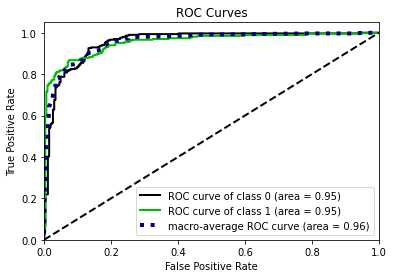

In [87]:
print("Accuracy score:",accuracy_score(y_test,y_pred_rf))
print(f"Sensitivity is: {recall_score(y_test,y_pred_rf):.3f}")
print(f"Precision is: {precision_score(y_test,y_pred_rf):.3f}")
print(f"F1 Score is: {f1_score(y_test,y_pred_rf):.3f}")
print()
#Confusion Matrix
confmat=pd.DataFrame(confusion_matrix(y_test,y_pred_rf),index=['True[0]','True[1]'],columns=['Predict[0]','Predict[1]'])
print(confmat)

print("\nClassification Report")
print(classification_report(y_test,y_pred_rf))
#ROC curve with all the classes
skplt.metrics.plot_roc(y_test,rf_model.predict_proba(X_test_new),plot_micro=False)
plt.show()